# TABLE 1 CLEAN UP
----

In [1]:
import os
import csv
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook                 

In [2]:
#Open reosurces file
table1_path = os.path.join("Resources", "Raw Data", "Table 1 - US-oilexports.csv")

In [3]:
# Read csv
table1_data = pd.read_csv(table1_path, header=0, skiprows=2)

# Extract column of interest
table1_df = pd.DataFrame(table1_data, columns= ['Date','U.S. Exports of Crude Oil (Thousand Barrels)'])
table1_df.head(10)

,Date,U.S. Exports of Crude Oil (Thousand Barrels)
0,Jan-1920,469.0
1,Feb-1920,853.0
2,Mar-1920,892.0
3,Apr-1920,693.0
4,May-1920,761.0
5,Jun-1920,627.0
6,Jul-1920,723.0
7,Aug-1920,553.0
8,Sep-1920,790.0
9,Oct-1920,777.0


In [4]:
date = table1_df["Date"]
crude_export = table1_df["U.S. Exports of Crude Oil (Thousand Barrels)"]

# Since date is in MMM-YYYY format, convert to dtype Datetime64[ns]
date_64ns = pd.to_datetime(table1_df["Date"])


In [5]:
# Get rid of the minutes and seconds
formated_date_list = []

for item in date_64ns:
    date_clean = str(item)[:10]
    formated_date_list.append(date_clean)


In [6]:
# Create new data, Date is in datetime type
table1_df_clean =  pd.DataFrame({
                        "Date": formated_date_list,
                        "U.S. Exports of Crude Oil (Thousand Barrels)": crude_export
                       })



#Drop NaN rows
table1_df_clean.dropna(inplace=True) 
table1_df_clean.head()

,Date,U.S. Exports of Crude Oil (Thousand Barrels)
0,1920-01-01,469.0
1,1920-02-01,853.0
2,1920-03-01,892.0
3,1920-04-01,693.0
4,1920-05-01,761.0


In [7]:
# Convert date to datetime dtype and format YY-MM-DD
table1_df_clean['Date_dt'] = pd.to_datetime(table1_df_clean['Date'], format='%Y-%m-%d')

In [8]:
#Set start date
sdate = dt.datetime(2005,1,1)   # start date
edate = dt.datetime(2019,12,30)   # end date

table1_range = table1_df_clean[(table1_df_clean['Date_dt']>=sdate ) & (table1_df_clean['Date_dt']<= edate)]
table1_clean = table1_range[["Date_dt", "U.S. Exports of Crude Oil (Thousand Barrels)"]]
table1_final = table1_clean.rename(columns={ "Date_dt" : "Date"})
table1_final.dtypes

Date                                            datetime64[ns]
U.S. Exports of Crude Oil (Thousand Barrels)           float64
dtype: object

In [9]:
# Export leaned table 1 to csv
table1_final.to_csv("Resources/Clean Data/Table 1.csv", index=False)                

In [10]:
# This analysis only includes Crude Oil and exclude NG exports

# TABLE 1B CLEAN UP

In [11]:
table1B_path = os.path.join("Resources", "Raw Data", "Table 1B - U.S._Field_Production_of_Crude_Oil.csv")

In [12]:
# Read csv
table1B_data = pd.read_csv(table1B_path, header=0, skiprows=4)

# Extract column of interest
table1B_df = pd.DataFrame(table1B_data)

table1B_rename = table1B_df.rename(columns={ "Month" : "Date"})

table1B_rename

,Date,U.S. Field Production of Crude Oil Thousand Barrels per Day
0,Aug-20,10579
1,Jul-20,10980
2,Jun-20,10442
3,May-20,10019
4,Apr-20,12010
...,...,...
1203,May-20,1181
1204,Apr-20,1165
1205,Mar-20,1167
1206,Feb-20,1145


In [13]:
table1B_rename['Date'] = pd.to_datetime(table1B_rename["Date"], format='%b-%y')
table1B_rename.head()
table1B_rename.dtypes

Date                                                           datetime64[ns]
U.S. Field Production of Crude Oil Thousand Barrels per Day             int64
dtype: object

In [14]:
merge_1_1B = pd.merge(table1_final, table1B_rename, on="Date", how="left")
merge_1_1B.head()

,Date,U.S. Exports of Crude Oil (Thousand Barrels),U.S. Field Production of Crude Oil Thousand Barrels per Day
0,2005-01-01,1239.0,5446
1,2005-02-01,541.0,5501
2,2005-03-01,1111.0,5601
3,2005-04-01,1345.0,5563
4,2005-05-01,1694.0,5596


In [15]:
# Export 1b csv
table1B_rename.to_csv("Resources/Clean Data/Table 1b.csv", index=False)  

# TABLE 3 CLEAN UP
-----
This table contains **US dollar index**.

In [16]:
#Open reosurces file
table3_path = os.path.join("Resources", "Raw Data", "Table 3 - US-dollar-index-historical-chart.csv")

In [17]:
# Read csv
table3_data = pd.read_csv(table3_path, header=0, skiprows=15)

# Extract column of interest
table3_df = pd.DataFrame(table3_data).reset_index(drop=True)

In [18]:
# Convert date to datetime dtype and format YY-MM-DD
table3_df['Date_dt'] = pd.to_datetime(table3_df['date'], format='%Y-%m-%d')

In [19]:
#Set start date
sdate = dt.datetime(2005,1,1)   # start date
edate = dt.datetime(2019,12,30)   # end date

table3_range = table3_df[(table3_df['Date_dt']>=sdate ) & (table3_df['Date_dt']<= edate)]


# Change header name
table3_clean = table3_range.rename(columns={ "Date_dt" : "Date", " value" : "US Dollars Index"})
table3_final = table3_clean[["Date", "US Dollars Index"]]
table3_final

,Date,US Dollars Index
384,2005-01-01,95.450
385,2005-02-01,95.698
386,2005-03-01,95.307
387,2005-04-01,96.234
388,2005-05-01,96.470
...,...,...
559,2019-08-01,102.809
560,2019-09-01,102.766
561,2019-10-01,102.203
562,2019-11-01,101.954


In [20]:
# Export leaned table 3 to csv
table3_final.to_csv("Resources/Clean Data/Table 3.csv", index=False)                

In [21]:
# Merge with Table 1
merge_1_1B_3 = pd.merge(merge_1_1B, table3_final, on="Date", how="left")
merge_1_1B_3

,Date,U.S. Exports of Crude Oil (Thousand Barrels),U.S. Field Production of Crude Oil Thousand Barrels per Day,US Dollars Index
0,2005-01-01,1239.0,5446,95.450
1,2005-02-01,541.0,5501,95.698
2,2005-03-01,1111.0,5601,95.307
3,2005-04-01,1345.0,5563,96.234
4,2005-05-01,1694.0,5596,96.470
...,...,...,...,...
168,2019-01-01,79830.0,11865,100.401
169,2019-02-01,83721.0,11679,100.403
170,2019-03-01,83196.0,11937,100.772
171,2019-04-01,85276.0,12135,100.746


# TABLE 7 CLEAN UP

This table contains US GDP from **Oil Export**

In [22]:
#Open reosurces file
table7_path = os.path.join("Resources", "Raw Data", "Table 7 - US GDP Data By Q.csv")

In [23]:
# Read csv
table7_data = pd.read_csv(table7_path, header=0, skiprows=3)

# Extract column of interest
table7_df = pd.DataFrame(table7_data).reset_index(drop=True)
quarter_row = table7_df.iloc[:3]

table7_df.dropna(how = "any", inplace = True)
# # table7_clean = table7_df.loc[table7_df["Line", "Line,"        Oil and gas extraction"]]
table_filter = table7_df[table7_df.columns[1]].str.contains("Oil")

# table_filter_2 = table7_df.iloc[0]
new_table7_df = quarter_row.append(table7_df[table_filter])

# table7_df.set_index("Line", inplace=True)
new_table7_df

,"Last Revised on: September 30, 2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Line,NaN,2005,2005,2005,2005,2006,2006,2006,2006,...,2018,2018,2018,2018,2019,2019,2019,2019,2020,2020
1,Line,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,...,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2
2,1,Gross domestic product,12761.3,12910,13142.9,13332.3,13603.9,13749.8,13867.5,14037.2,...,20242.2,20552.7,20742.7,20909.9,21115.3,21329.9,21540.3,21747.4,21561.1,19520.1
8,7,Oil and gas extraction,133.5,143.7,160.6,186.3,181.2,179.5,180.7,174.2,...,201.5,212.7,226.2,218.8,198.1,199.5,186,188.8,138.8,49.7


In [24]:
# Transpose dataframe

new_table7_df.drop(columns=["Last Revised on: September 30, 2020", "Unnamed: 1"], inplace=True)


In [25]:
clean_table7_df = new_table7_df.T
clean_table7_df

,0,1,2,8
Unnamed: 2,2005,Q1,12761.3,133.5
Unnamed: 3,2005,Q2,12910,143.7
Unnamed: 4,2005,Q3,13142.9,160.6
Unnamed: 5,2005,Q4,13332.3,186.3
Unnamed: 6,2006,Q1,13603.9,181.2
...,...,...,...,...
Unnamed: 59,2019,Q2,21329.9,199.5
Unnamed: 60,2019,Q3,21540.3,186
Unnamed: 61,2019,Q4,21747.4,188.8
Unnamed: 62,2020,Q1,21561.1,138.8


In [26]:
clean_table7_df["Date_1"] = clean_table7_df[0] + "-" + clean_table7_df[1]
clean_table7_df['Date'] = pd.to_datetime(clean_table7_df["Date_1"])

table7_final = clean_table7_df[["Date", 2,8]]

table7_final.columns = ["Date", "Gross domestic product", "US GDP by Oil and Gas Extraction"]
table7_final.reset_index(drop = True, inplace = True)

table7_final_2 = table7_final[(table7_final['Date']>= '2005-01-01' ) & (table7_final['Date']<= '2019-12-30')]


gross = table7_final_2['Gross domestic product'].astype(float)
gdp_og = table7_final_2['US GDP by Oil and Gas Extraction'].astype(float)

gdp_percentage = gdp_og / gross * 100

table7_final_2["GDP % from O&G"] = gdp_percentage

table7_final_2["GDP % from O&G"] = table7_final_2["GDP % from O&G"].map('{:,.2f}'.format)

table7_final_2.head()

C:\Users\navyh\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\navyh\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Gross domestic product,US GDP by Oil and Gas Extraction,GDP % from O&G
0,2005-01-01,12761.3,133.5,1.05
1,2005-04-01,12910,143.7,1.11
2,2005-07-01,13142.9,160.6,1.22
3,2005-10-01,13332.3,186.3,1.40
4,2006-01-01,13603.9,181.2,1.33


In [27]:
# Export leaned table 7 to csv
table7_final_2.to_csv("Resources/Clean Data/Table 7.csv", index=False)                

# MERGE TABLES

In [28]:
merge_big = pd.merge(merge_1_1B_3, table7_final_2, on="Date", how="left")
merge_big['U.S. Field Production of Crude Oil Thousand Barrels'] = merge_big['U.S. Field Production of Crude Oil Thousand Barrels per Day'] * 30 
merge_big.head()

,Date,U.S. Exports of Crude Oil (Thousand Barrels),U.S. Field Production of Crude Oil Thousand Barrels per Day,US Dollars Index,Gross domestic product,US GDP by Oil and Gas Extraction,GDP % from O&G,U.S. Field Production of Crude Oil Thousand Barrels
0,2005-01-01,1239.0,5446,95.450,12761.3,133.5,1.05,163380
1,2005-02-01,541.0,5501,95.698,NaN,NaN,NaN,165030
2,2005-03-01,1111.0,5601,95.307,NaN,NaN,NaN,168030
3,2005-04-01,1345.0,5563,96.234,12910,143.7,1.11,166890
4,2005-05-01,1694.0,5596,96.470,NaN,NaN,NaN,167880


In [29]:
# merge_final['US GDP by Oil and Gas Extraction'] = merge_final['US GDP by Oil and Gas Extraction'].replace(np.nan, 0)
merge_big['Gross domestic product'] = merge_big["Gross domestic product"].fillna(method='ffill')
merge_big['US GDP by Oil and Gas Extraction'] = merge_big["US GDP by Oil and Gas Extraction"].fillna(method='ffill')
merge_big['GDP % from O&G'] = merge_big["GDP % from O&G"].fillna(method='ffill')

merge_final = merge_big[["Date", 'U.S. Field Production of Crude Oil Thousand Barrels', 
                         'U.S. Exports of Crude Oil (Thousand Barrels)', 'US Dollars Index',
                         "Gross domestic product", "US GDP by Oil and Gas Extraction", 'GDP % from O&G']]

merge_final.head(10)

,Date,U.S. Field Production of Crude Oil Thousand Barrels,U.S. Exports of Crude Oil (Thousand Barrels),US Dollars Index,Gross domestic product,US GDP by Oil and Gas Extraction,GDP % from O&G
0,2005-01-01,163380,1239.0,95.450,12761.3,133.5,1.05
1,2005-02-01,165030,541.0,95.698,12761.3,133.5,1.05
2,2005-03-01,168030,1111.0,95.307,12761.3,133.5,1.05
3,2005-04-01,166890,1345.0,96.234,12910,143.7,1.11
4,2005-05-01,167880,1694.0,96.470,12910,143.7,1.11
5,2005-06-01,163260,640.0,97.334,12910,143.7,1.11
6,2005-07-01,157590,1058.0,97.987,13142.9,160.6,1.22
7,2005-08-01,155940,531.0,97.148,13142.9,160.6,1.22
8,2005-09-01,126420,727.0,98.022,13142.9,160.6,1.22
9,2005-10-01,136650,530.0,98.909,13332.3,186.3,1.40


In [31]:
merge_final.to_csv("Transformed Data/Part 1.csv", index=False)

# PLOTTING

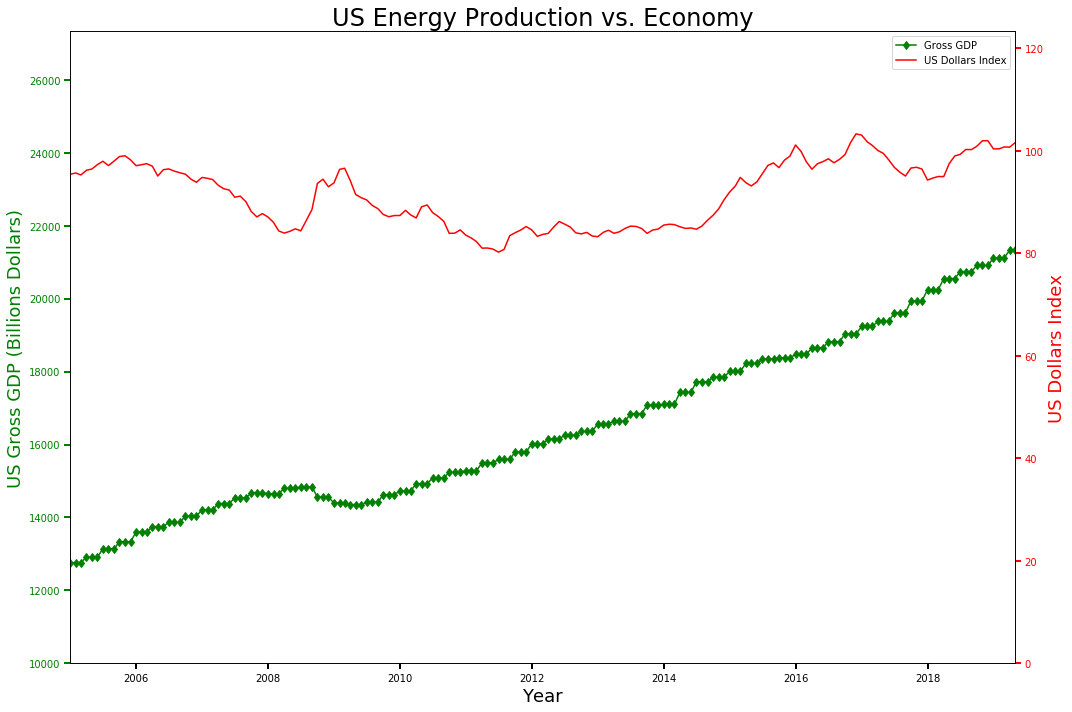

In [32]:
x_axis = merge_final["Date"]
y_axis_1 = merge_final["U.S. Exports of Crude Oil (Thousand Barrels)"]
y_axis_2 = merge_final["US Dollars Index"]
y_axis_3 = merge_final["US GDP by Oil and Gas Extraction"].astype(float)
y_axis_4 = merge_final["Gross domestic product"].astype(float)
y_axis_5 = merge_final["U.S. Field Production of Crude Oil Thousand Barrels"].astype(float)


fig, host = plt.subplots(figsize=(15,10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()

p1, = host.plot(x_axis, y_axis_4, "dg-", label="Gross GDP")
p2, = par1.plot(x_axis, y_axis_2, "r-", label="US Dollars Index")

host.set_title("US Energy Production vs. Economy", fontsize=24)
host.set_xlim(min(x_axis), max(x_axis) )
host.set_ylim(10000,max(y_axis_4) + 6000 )
par1.set_ylim(0, max(y_axis_2) + 20)

host.set_xlabel("Year", fontsize=18)
host.set_ylabel("US Gross GDP (Billions Dollars)", fontsize=18)
par1.set_ylabel("US Dollars Index", fontsize=18)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=6, width=2)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()
plt.savefig("Plots/Question 3 - US GDP vs. Dollars.png", bbox_inches='tight')


plt.show()



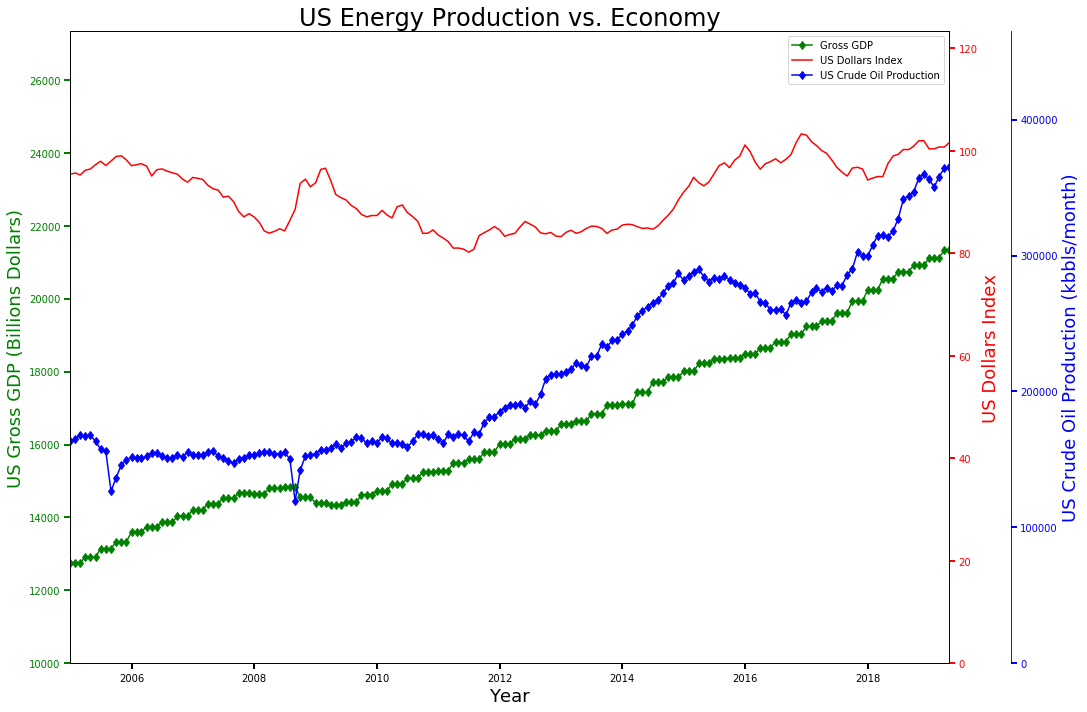

In [33]:
x_axis = merge_final["Date"]
y_axis_1 = merge_final["U.S. Exports of Crude Oil (Thousand Barrels)"]
y_axis_2 = merge_final["US Dollars Index"]
y_axis_3 = merge_final["US GDP by Oil and Gas Extraction"].astype(float)
y_axis_4 = merge_final["Gross domestic product"].astype(float)
y_axis_5 = merge_final["U.S. Field Production of Crude Oil Thousand Barrels"].astype(float)


fig, host = plt.subplots(figsize=(15,10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_visible(True)
par2.spines["right"].set_position(("axes", 1.07))


p1, = host.plot(x_axis, y_axis_4, "dg-", label="Gross GDP")
p2, = par1.plot(x_axis, y_axis_2, "r-", label="US Dollars Index")
p3, = par2.plot(x_axis, y_axis_5, "db-", label="US Crude Oil Production")

host.set_title("US Energy Production vs. Economy", fontsize=24)
host.set_xlim(min(x_axis), max(x_axis) )
host.set_ylim(10000,max(y_axis_4) + 6000 )
par1.set_ylim(0, max(y_axis_2) + 20)
par2.set_ylim(0, max(y_axis_5)+100000)

host.set_xlabel("Year", fontsize=18)
host.set_ylabel("US Gross GDP (Billions Dollars)", fontsize=18)
par1.set_ylabel("US Dollars Index", fontsize=18)
par2.set_ylabel("US Crude Oil Production (kbbls/month)", fontsize=18)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=6, width=2)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2,p3]

host.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()
plt.savefig("Plots/Question 1 - US Energy Production vs. Dollars (1A).png", bbox_inches='tight')


plt.show()


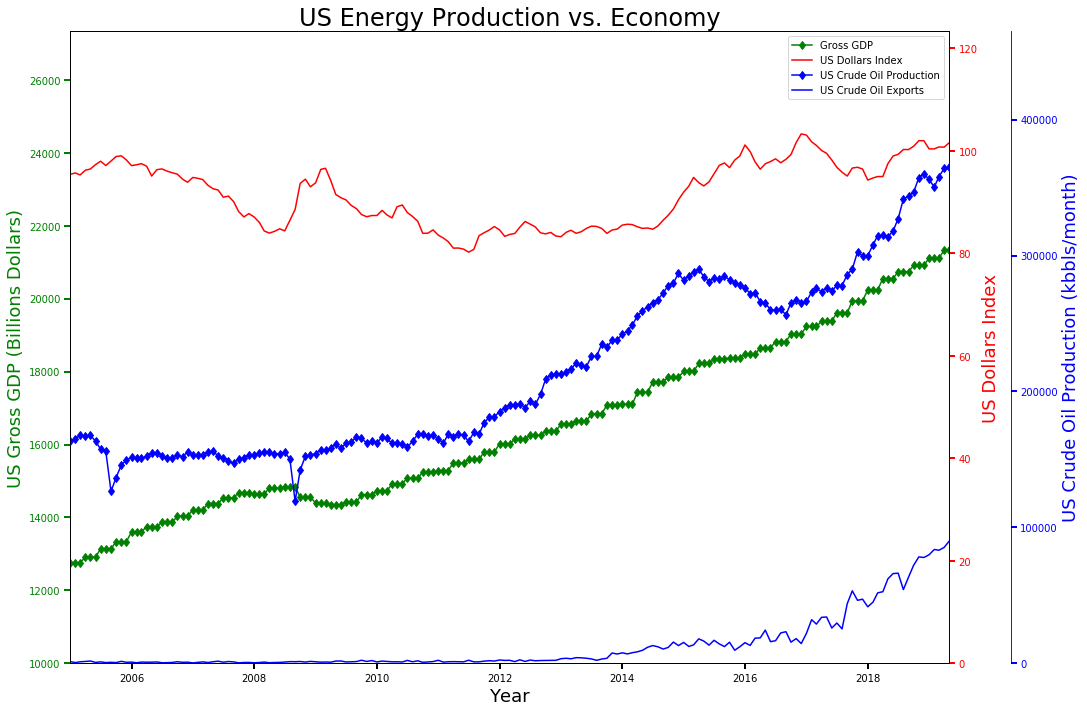

In [34]:
x_axis = merge_final["Date"]
y_axis_1 = merge_final["U.S. Exports of Crude Oil (Thousand Barrels)"]
y_axis_2 = merge_final["US Dollars Index"]
y_axis_3 = merge_final["US GDP by Oil and Gas Extraction"].astype(float)
y_axis_4 = merge_final["Gross domestic product"].astype(float)
y_axis_5 = merge_final["U.S. Field Production of Crude Oil Thousand Barrels"].astype(float)


fig, host = plt.subplots(figsize=(15,10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_visible(True)
par2.spines["right"].set_position(("axes", 1.07))


p1, = host.plot(x_axis, y_axis_4, "dg-", label="Gross GDP")
p2, = par1.plot(x_axis, y_axis_2, "r-", label="US Dollars Index")
p3, = par2.plot(x_axis, y_axis_5, "db-", label="US Crude Oil Production")
p4, = par2.plot(x_axis, y_axis_1, "b-", label="US Crude Oil Exports")


host.set_title("US Energy Production vs. Economy", fontsize=24)
host.set_xlim(min(x_axis), max(x_axis) )
host.set_ylim(10000,max(y_axis_4) + 6000 )
par1.set_ylim(0, max(y_axis_2) + 20)
par2.set_ylim(0, max(y_axis_5)+100000)

host.set_xlabel("Year", fontsize=18)
host.set_ylabel("US Gross GDP (Billions Dollars)", fontsize=18)
par1.set_ylabel("US Dollars Index", fontsize=18)
par2.set_ylabel("US Crude Oil Production (kbbls/month)", fontsize=18)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=6, width=2)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2,p3, p4]

host.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()
plt.savefig("Plots/Question 1 - US Energy Production vs. Dollars (1B).png", bbox_inches='tight')


plt.show()


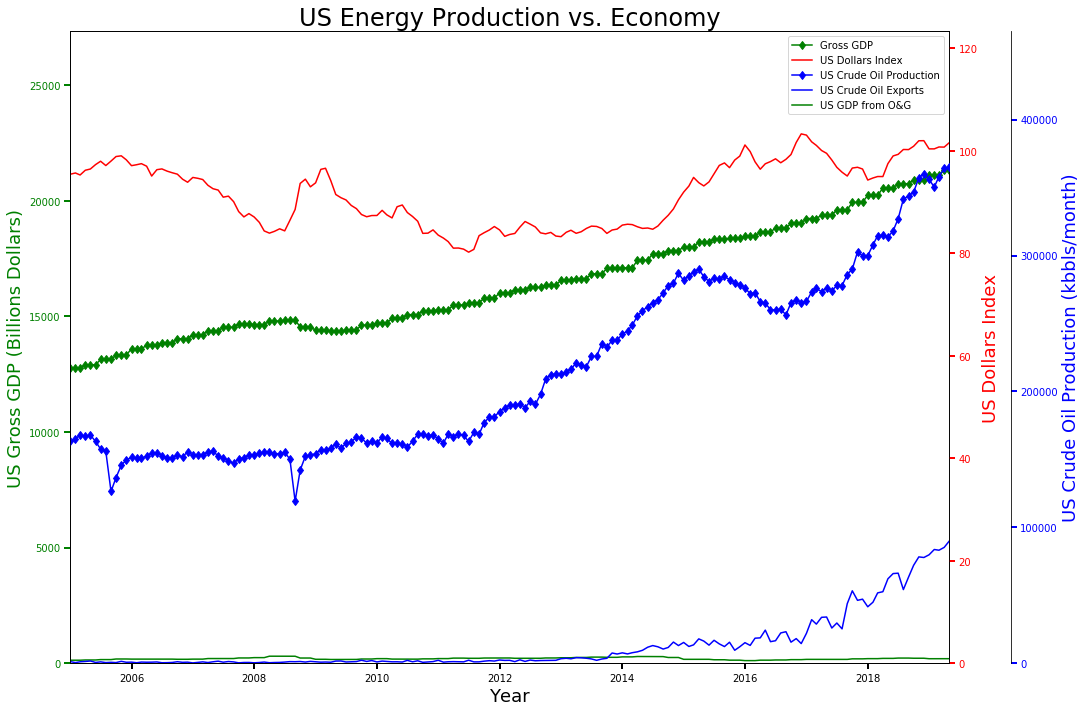

In [35]:
x_axis = merge_final["Date"]
y_axis_1 = merge_final["U.S. Exports of Crude Oil (Thousand Barrels)"]
y_axis_2 = merge_final["US Dollars Index"]
y_axis_3 = merge_final["US GDP by Oil and Gas Extraction"].astype(float)
y_axis_4 = merge_final["Gross domestic product"].astype(float)
y_axis_5 = merge_final["U.S. Field Production of Crude Oil Thousand Barrels"].astype(float)


fig, host = plt.subplots(figsize=(15,10))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_visible(True)
par2.spines["right"].set_position(("axes", 1.07))


p1, = host.plot(x_axis, y_axis_4, "dg-", label="Gross GDP")
p2, = par1.plot(x_axis, y_axis_2, "r-", label="US Dollars Index")
p3, = par2.plot(x_axis, y_axis_5, "db-", label="US Crude Oil Production")
p4, = par2.plot(x_axis, y_axis_1, "b-", label="US Crude Oil Exports")
p5, = host.plot(x_axis, y_axis_3, "g-", label="US GDP from O&G")


host.set_title("US Energy Production vs. Economy", fontsize=24)
host.set_xlim(min(x_axis), max(x_axis) )
host.set_ylim(0,max(y_axis_4) + 6000 )
par1.set_ylim(0, max(y_axis_2) + 20)
par2.set_ylim(0, max(y_axis_5)+100000)

host.set_xlabel("Year", fontsize=18)
host.set_ylabel("US Gross GDP (Billions Dollars)", fontsize=18)
par1.set_ylabel("US Dollars Index", fontsize=18)
par2.set_ylabel("US Crude Oil Production (kbbls/month)", fontsize=18)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=6, width=2)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2,p3, p4, p5]

host.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()
plt.savefig("Plots/Question 1 - US Energy Production vs. Dollars (1C).png", bbox_inches='tight')


plt.show()





C:\Users\navyh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\navyh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


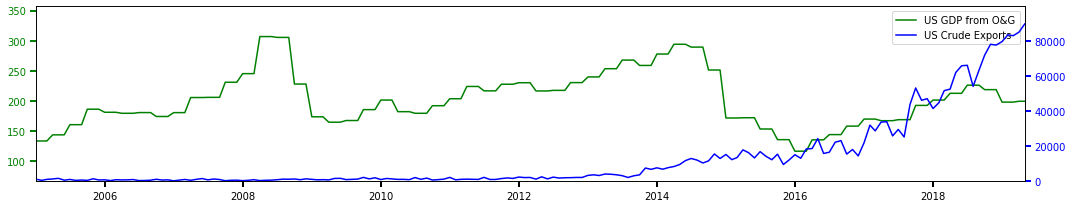

In [37]:
merge_final['Gross domestic product'] = merge_final['Gross domestic product'].astype(float) 
merge_final['US GDP by Oil and Gas Extraction'] = merge_final['US GDP by Oil and Gas Extraction'].astype(float) 

x_axis = merge_final["Date"]
y_axis_1 = merge_final["U.S. Exports of Crude Oil (Thousand Barrels)"]
y_axis_2 = merge_final["US Dollars Index"]
y_axis_3 = merge_final["US GDP by Oil and Gas Extraction"].astype(float)
y_axis_4 = merge_final["Gross domestic product"].astype(float)
y_axis_5 = merge_final["U.S. Field Production of Crude Oil Thousand Barrels"].astype(float)


fig, host = plt.subplots(figsize=(15,3))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()

p1, = host.plot(x_axis, y_axis_3, "g-", label="US GDP from O&G")
p2, = par1.plot(x_axis, y_axis_1, "b-", label="US Crude Exports")


# host.set_title("US Energy Production vs. Economy", fontsize=24)
host.set_xlim(min(x_axis), max(x_axis) )
host.set_ylim(min(y_axis_3) - 50 , max(y_axis_3) +50 )
par1.set_ylim(0, max(y_axis_1) + 10000)
# par2.set_ylim(min(y_axis_1) , max(y_axis_1) + 100000)

# host.set_xlabel("Year", fontsize=18)
# host.set_ylabel("US GDP from O&G (Billions Dollars)", fontsize=18)
# par1.set_ylabel("US Dollars Index", fontsize=18)
# par2.set_ylabel("US Crude Oil Exports (kbbls/month)", fontsize=18)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=6, width=2)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)

host.tick_params(axis='x', **tkw)

lines = [p1, p2]

host.legend(lines, [l.get_label() for l in lines], loc='best')
plt.tight_layout()
plt.savefig("Plots/Question 1 - US Energy Production vs. Dollars (1D).png", bbox_inches='tight')


plt.show()


In [38]:
merge_final.corr()

,U.S. Field Production of Crude Oil Thousand Barrels,U.S. Exports of Crude Oil (Thousand Barrels),US Dollars Index,Gross domestic product,US GDP by Oil and Gas Extraction
U.S. Field Production of Crude Oil Thousand Barrels,1.000000,0.846293,0.439936,0.961647,-0.049526
U.S. Exports of Crude Oil (Thousand Barrels),0.846293,1.000000,0.551974,0.836537,-0.070823
US Dollars Index,0.439936,0.551974,1.000000,0.366016,-0.643719
Gross domestic product,0.961647,0.836537,0.366016,1.000000,0.001373
US GDP by Oil and Gas Extraction,-0.049526,-0.070823,-0.643719,0.001373,1.000000
